Connect Google Colab to Google drive

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Figure out the path of data
*   In our case we utilized TF Keras preprocessing to resize, shuffle, and split data between training and validation.



In [77]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Train")
ds_training = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Train", validation_split=0.2, subset="training", seed=123, shuffle=True)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Train", validation_split=0.2, subset="validation", seed=123)
ds_testing = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Test")

print(ds_training.class_names)


Found 1826 files belonging to 2 classes.
Found 1826 files belonging to 2 classes.
Using 1461 files for training.
Found 1826 files belonging to 2 classes.
Using 365 files for validation.
Found 514 files belonging to 2 classes.
['edible', 'inedible']


Seeing if anything went wrong within the pre-processing methods

1.   Looking at the shape of the batch we can see there are 32 images, that follow a 256x256 pixel in a RGB format.
2.   An example off something going wrong for us was something like (None, 32, 256, 256, 3), which told us we we're group data one extra (unecessary) time.



In [78]:
dataset_iterator = dataset.as_numpy_iterator();
batch = dataset_iterator.next()
batch
batch[0].shape

(32, 256, 256, 3)

Displaying the class names so we know which images displayed fall under which label in the following cell.

*   As shown, 'edible' = 0 and 'inedible' = 1




In [79]:
print(ds_training.class_names)

['edible', 'inedible']


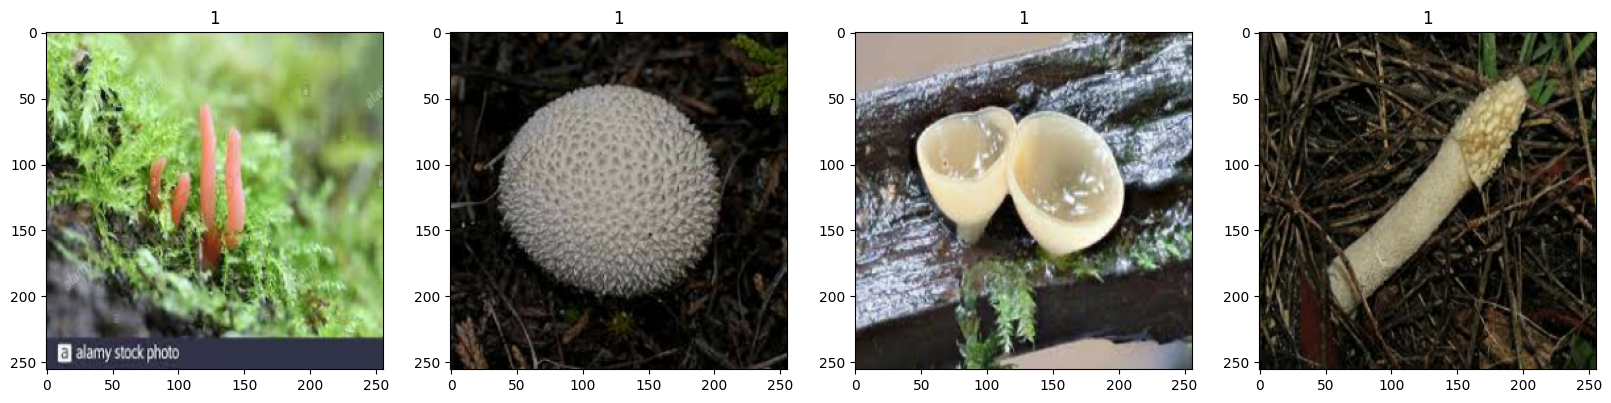

In [80]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


Beginning Pre-processing, starting with scaling our images to down to values between 0-1.

In [81]:
scaled = batch[0] / 255

In [82]:
print(scaled.min())
print(scaled.max())


0.0
1.0


In [83]:
#Applying the scaling to our images.
dataset = dataset.map(lambda x,y: (x/255, y)) # x = images , y = labels\

In [84]:
#Checking if each image has been scaled down.
dataset.as_numpy_iterator().next()[0]

array([[[[4.77144599e-01, 6.26164198e-01, 5.35968125e-01],
         [2.59857535e-01, 4.08877134e-01, 3.18681061e-01],
         [3.23621333e-01, 4.72640932e-01, 3.82444859e-01],
         ...,
         [2.70128667e-01, 5.31380236e-01, 1.76394004e-02],
         [2.62882978e-01, 5.60301781e-01, 2.75735307e-04],
         [2.70542294e-01, 5.68581522e-01, 0.00000000e+00]],

        [[3.13283175e-01, 4.54855859e-01, 3.67142081e-01],
         [2.53107995e-01, 4.01995927e-01, 3.11843753e-01],
         [2.14214548e-01, 3.55962813e-01, 2.68044204e-01],
         ...,
         [3.14854085e-01, 5.71184874e-01, 6.17064238e-02],
         [2.85750419e-01, 5.75722337e-01, 1.57840513e-02],
         [2.90532410e-01, 5.76116204e-01, 1.49816172e-02]],

        [[1.82523325e-01, 3.18281859e-01, 2.28899077e-01],
         [1.91881403e-01, 3.36107045e-01, 2.44405523e-01],
         [2.58871138e-01, 3.94878179e-01, 3.05209965e-01],
         ...,
         [3.20938796e-01, 5.68499982e-01, 6.53244033e-02],
         [

In [85]:
scaled_iterator = dataset.as_numpy_iterator()

In [86]:
batch = scaled_iterator.next()

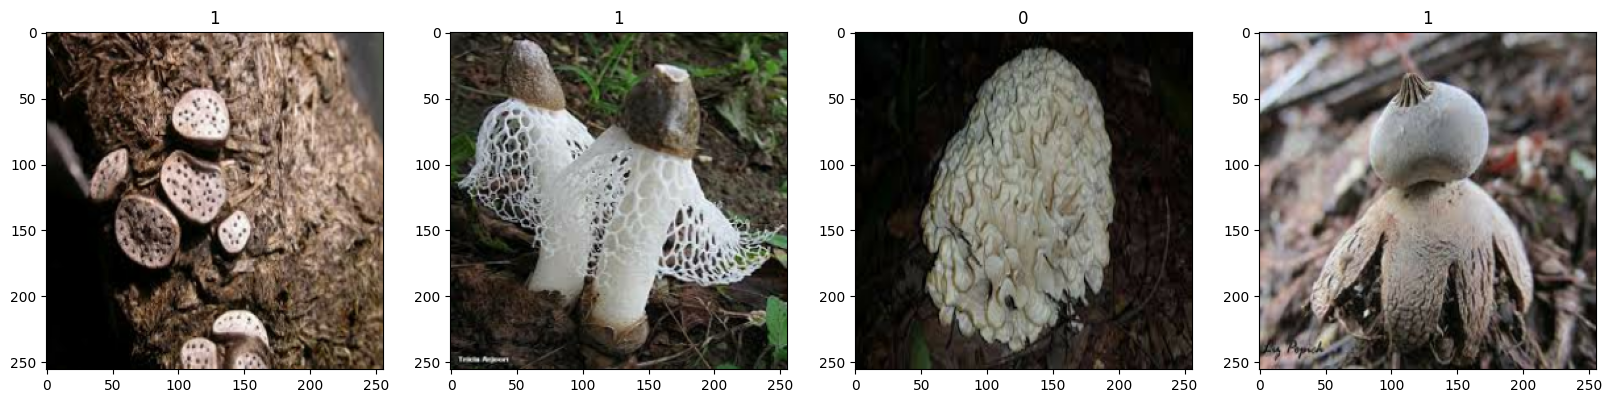

In [87]:
#Retreiving a batch of our images
scaled_iterator = dataset.as_numpy_iterator()
batch = scaled_iterator.next()

#Displaying the images to check scaling the images had negatively effected
#    visibility of our images
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img) #WARNING: if you do .imshow(img.astype(int)) images will be displayed in full black.
  ax[idx].title.set_text(batch[1][idx])

In [88]:
batch[0].min()

0.0

In [89]:
len(dataset)

58

Partitioning the data for training, validation, and testing.


In [90]:
train_size = int(len(dataset)*0.7)
val_size = int(len(dataset)*0.2)
test_size = int(len(dataset)*0.1) + 2

In [91]:
train_size


40

In [92]:
val_size

11

In [93]:
test_size

7

In [94]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

Trying some data augmentations

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(height_factor=(0, 0.1))
])

In [96]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):

  if shuffle:
    ds = ds.shuffle(1000)

  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  return ds.prefetch(buffer_size=AUTOTUNE)

In [97]:
train_iterator = train.as_numpy_iterator();
train_batch = train_iterator.next()
train_batch
train_batch[0].shape


(32, 256, 256, 3)

In [98]:
train_aug = prepare(train, shuffle=True, augment=True)
val = prepare(val)
test = prepare(test)

Displaying our augmented images to check if it has been applied properly.
We should see images that are rotated or flipped horizontally or vertically.

A surefire way to see images are being properly augmented is using a function that alters the image's brightness and/or contrast but that has not been included here.

In [99]:
train_aug_iterator = train_aug.as_numpy_iterator();
train_aug_batch = train_aug_iterator.next()
train_aug_batch
train_aug_batch[0].shape

(32, 256, 256, 3)

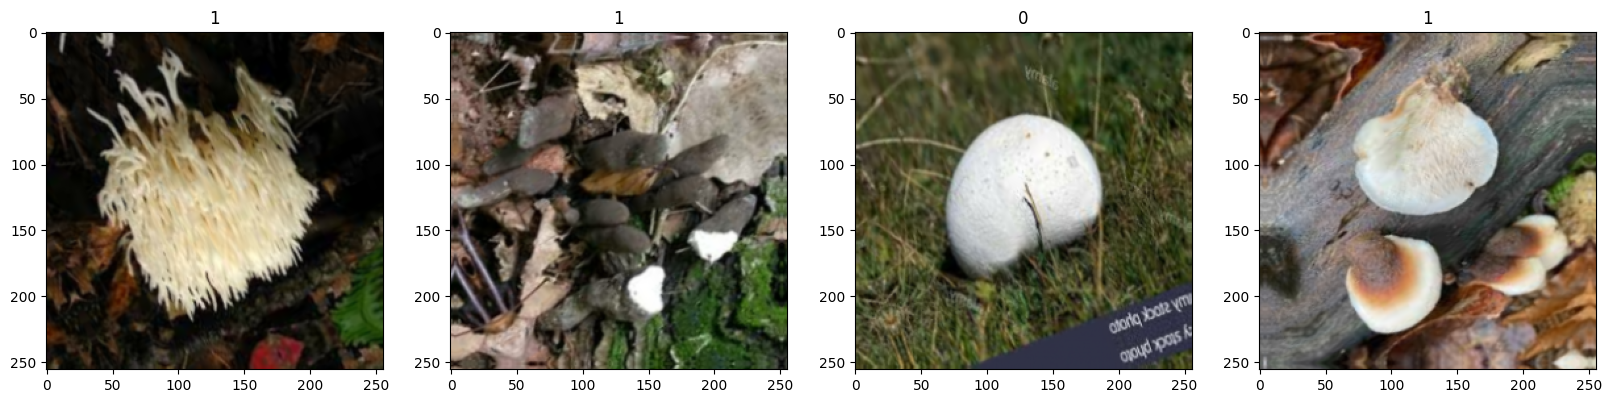

In [100]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(train_aug_batch[0][:4]) :
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])
#1 = inedible

Preprocessing done.

Time to create our model.

In [101]:
# #Instantiating our model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

shroomie_model = Sequential()

shroomie_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
shroomie_model.add(MaxPooling2D())

shroomie_model.add(Conv2D(32, (3,3), 1, activation='relu'))
shroomie_model.add(MaxPooling2D())

shroomie_model.add(Conv2D(16, (3,3), 1, activation='relu'))
shroomie_model.add(MaxPooling2D())
shroomie_model.add(Dropout(0.2))
shroomie_model.add(Flatten())
shroomie_model.add(Dense(256, activation='relu'))
shroomie_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
#Compile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import *

METRICS=['accuracy', Precision(), Recall(), AUC()]

shroomie_model.compile(optimizer=Adam(learning_rate= 5e-8),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [103]:
shroomie_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Stop training if val_loss doesn't improve after 3 epochs
es = EarlyStopping(patience= 5, monitor='val_loss')


model_cp = ModelCheckpoint(filepath= "/content/drive/MyDrive/Shroomies/2023-2024 Shroomies/BackendTeam/Saved-Models/Saved_Model_Weights/shroomiesCNN_modelv2.08.keras",
                           monitor = "val_loss",
                           save_best_only = True,
                           save_weights_only = False,
                           verbose = 1,
                           mode='min',
                           save_freq='epoch',
                           initial_value_threshold=None)


Training

In [105]:
#Fitting the model
BATCH_SIZE = 32

epochs = 100
history = shroomie_model.fit(
    train_aug,
    batch_size=BATCH_SIZE,
    validation_data = val,
    epochs=epochs,
    callbacks=[es, model_cp]

)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4316 - auc_8: 0.4880 - loss: 0.6992 - precision_8: 0.7668 - recall_8: 0.3481
Epoch 1: val_loss improved from inf to 0.69946, saving model to /content/drive/MyDrive/Shroomies/2023-2024 Shroomies/BackendTeam/Saved-Models/Saved_Model_Weights/shroomiesCNN_modelv2.08.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 624ms/step - accuracy: 0.4316 - auc_8: 0.4885 - loss: 0.6992 - precision_8: 0.7666 - recall_8: 0.3484 - val_accuracy: 0.3693 - val_auc_8: 0.4539 - val_loss: 0.6995 - val_precision_8: 0.6786 - val_recall_8: 0.2262
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4650 - auc_8: 0.5286 - loss: 0.6962 - precision_8: 0.7477 - recall_8: 0.3937
Epoch 2: val_loss improved from 0.69946 to 0.69705, saving model to /content/drive/MyDrive/Shroomies/2023-2024 Shroomies/BackendTeam/Saved-Models/Saved_Model_Weights/shroomiesCNN_modelv2.08.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 777ms/step - accuracy: 0.4653 - auc_8: 0.5288 - l

Plotting our Loss and Accuracy
Ideally we want to see both graphs converging, although with our inexperience the graphs produced by our model seems to be underperforming.

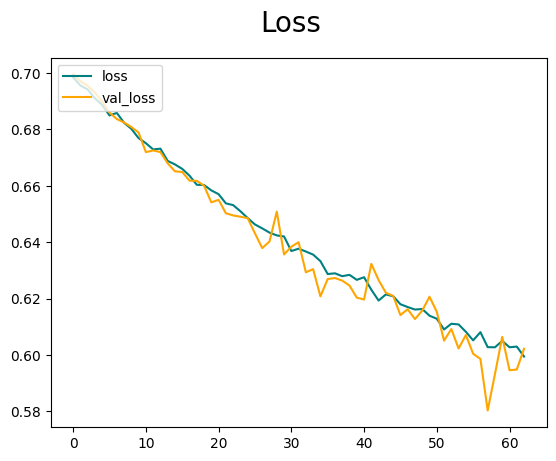

In [106]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

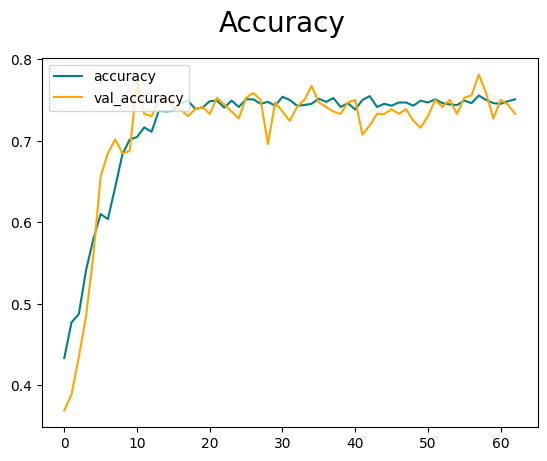

In [107]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Saving our model

In [108]:
#saving the model before converting to tf lite
# we chose to convert to tf lite for ease of upload
from tensorflow.keras.models import load_model
import shutil

shroomie_model.save("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Saved-Models/shroomiesCNN_modelv2.08.keras")

In [109]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(shroomie_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
# converter

#create the file path you want to save to
tflite_models_dir = pathlib.Path("/content/drive/MyDrive/Shroomies/2023-2024 Shroomies /BackendTeam/Saved-Models/tfLiteDR")
tflite_models_dir.mkdir(exist_ok = True, parents=True)

#safe the tf_lite_model
tflite_model_file = tflite_models_dir/"trainedModelV2.08_lite_nonTransfer.tflite"
tflite_model_file.write_bytes(tflite_model)

Saved artifact at '/tmp/tmp6g8__r3d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_120')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132849272092832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271806912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271814832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271907328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271900288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271902048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271566256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271554992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271558864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132849271557808: TensorSpec(shape=(), dtype=tf.resource, name=None)


3707296